# Part 1

# Clustering of data - Clustering methods are used to identify groups of similar objects



In [3]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#import dataset
dataset= pd.read_csv('Boston_Airbnb_DataSet.csv')

In [5]:
dataset.dropna()

,room_id,host_id,room_type,city,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name
3,5976821,432317,Shared room,Boston,South End,106.0,5.0,3.0,1.0,125.0,Heart of the South End Near It All!
4,14821064,21938320,Shared room,Boston,Back Bay,2.0,0.0,1.0,1.0,105.0,1 BR in the center of Newbury Street
5,8696200,19470226,Shared room,Boston,Downtown,12.0,5.0,2.0,1.0,103.0,Downtown Boston Condo Living Room
6,19625080,76727796,Shared room,Boston,Allston,0.0,0.0,2.0,1.0,80.0,Sunny Apartment
7,5990896,31035017,Shared room,Boston,Fenway,56.0,4.5,1.0,1.0,85.0,"Studio, 2 min walk Symphony/T Hynes"
8,13711242,40459423,Shared room,Boston,Downtown,9.0,5.0,2.0,1.0,90.0,"Located in ""the heart of the city"
9,3792147,6989109,Shared room,Boston,South Boston,72.0,4.5,1.0,1.0,83.0,Oceanview Penthouse Condo-Cool/Cozy/Amazing Vi...
12,3678429,18165984,Shared room,Boston,Dorchester,8.0,5.0,1.0,1.0,80.0,Immaculate Home away from home
13,19593617,127402910,Shared room,Boston,South Boston,0.0,0.0,1.0,1.0,74.0,South Boston near Convention Center and Seaport
14,9949819,31021638,Shared room,Boston,South End,2.0,0.0,2.0,1.0,77.0,South End Near Backbay Garden Apt


In [6]:
(dataset).isnull().sum()

room_id                  0
host_id                  0
room_type               12
city                    11
neighborhood             0
reviews                 16
overall_satisfaction     3
accommodates             4
bedrooms                12
price                    2
name                     8
dtype: int64

In [7]:
df= dataset

In [8]:
df=df.dropna(subset=['bedrooms','price', 'room_type', 'city', 'reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'price','name'])

In [9]:
(df).isnull().sum()

room_id                 0
host_id                 0
room_type               0
city                    0
neighborhood            0
reviews                 0
overall_satisfaction    0
accommodates            0
bedrooms                0
price                   0
name                    0
dtype: int64

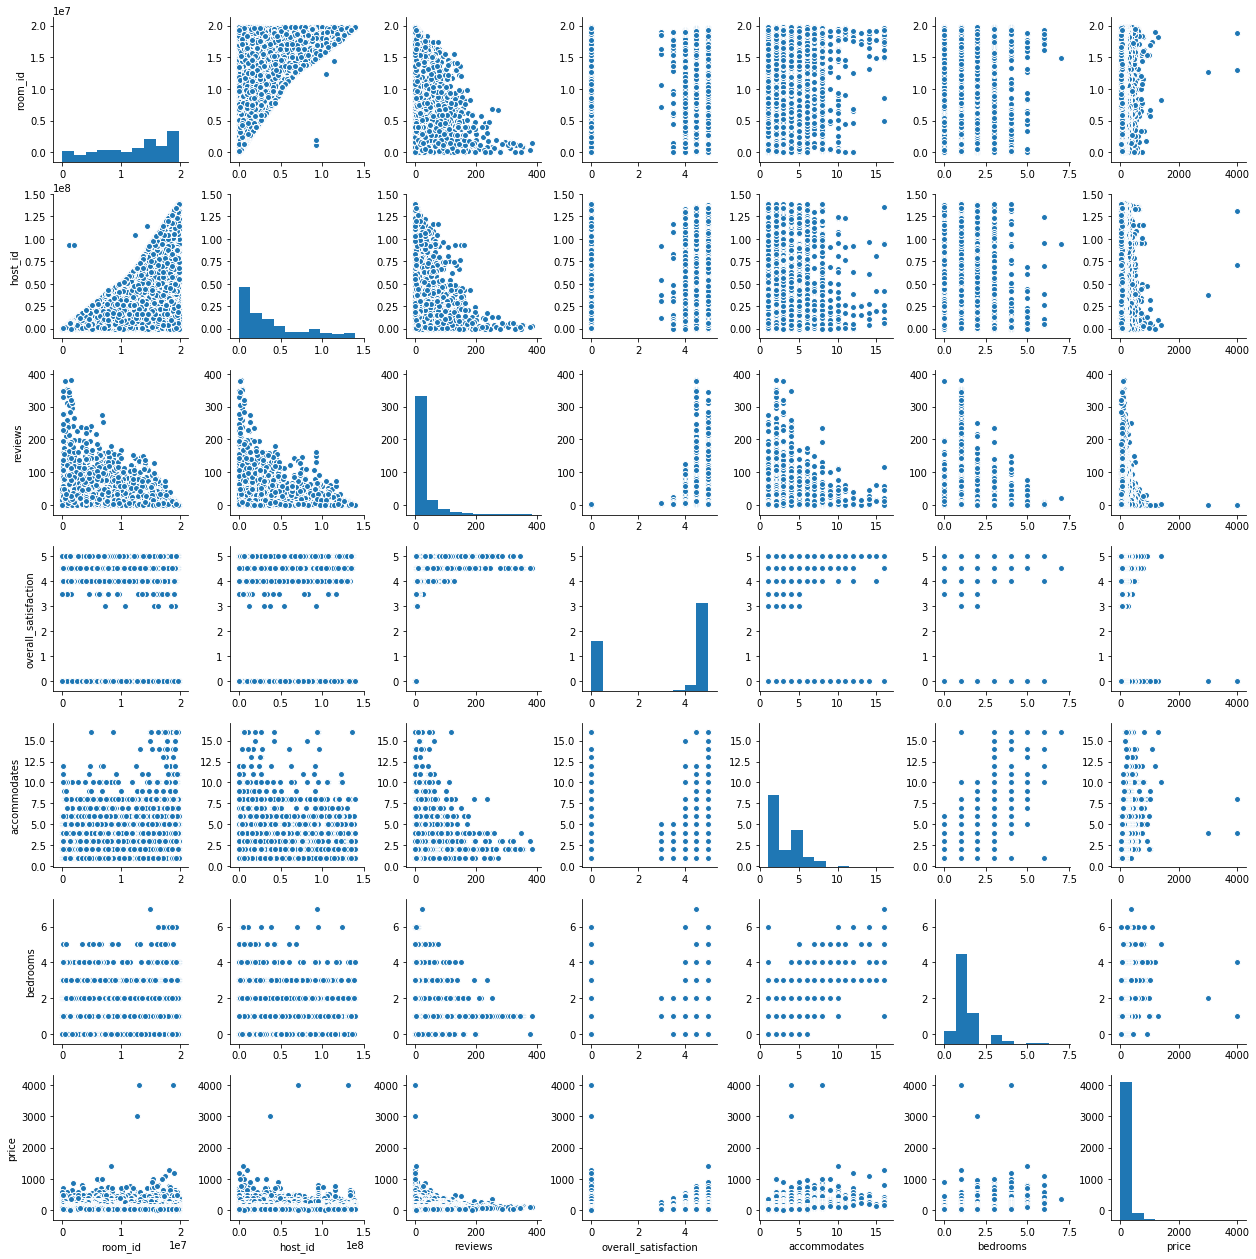

In [10]:
%matplotlib inline
import seaborn as sns
sns.pairplot(df)

In [11]:
corr_check = df.corr()
corr_check

,room_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,price
room_id,1.000000,0.509689,-0.420011,-0.306997,0.047964,0.013700,-0.051162
host_id,0.509689,1.000000,-0.202093,-0.175468,-0.015163,-0.024188,-0.030678
reviews,-0.420011,-0.202093,1.000000,0.396452,-0.020544,-0.040134,-0.108722
overall_satisfaction,-0.306997,-0.175468,0.396452,1.000000,0.032520,0.004886,-0.115513
accommodates,0.047964,-0.015163,-0.020544,0.032520,1.000000,0.771855,0.424694
bedrooms,0.013700,-0.024188,-0.040134,0.004886,0.771855,1.000000,0.381666
price,-0.051162,-0.030678,-0.108722,-0.115513,0.424694,0.381666,1.000000


In [12]:
# using elbow method to find optimum no of clusters
from sklearn.cluster import KMeans

In [13]:
df.head()

,room_id,host_id,room_type,city,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name
3,5976821,432317,Shared room,Boston,South End,106.0,5.0,3.0,1.0,125.0,Heart of the South End Near It All!
4,14821064,21938320,Shared room,Boston,Back Bay,2.0,0.0,1.0,1.0,105.0,1 BR in the center of Newbury Street
5,8696200,19470226,Shared room,Boston,Downtown,12.0,5.0,2.0,1.0,103.0,Downtown Boston Condo Living Room
6,19625080,76727796,Shared room,Boston,Allston,0.0,0.0,2.0,1.0,80.0,Sunny Apartment
7,5990896,31035017,Shared room,Boston,Fenway,56.0,4.5,1.0,1.0,85.0,"Studio, 2 min walk Symphony/T Hynes"


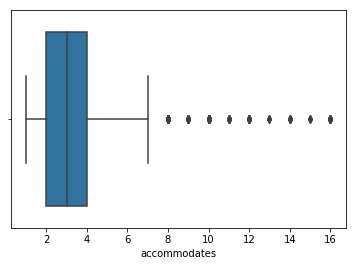

In [14]:
sns.boxplot(df['accommodates'])

In [15]:
df = df[df.accommodates < 8]

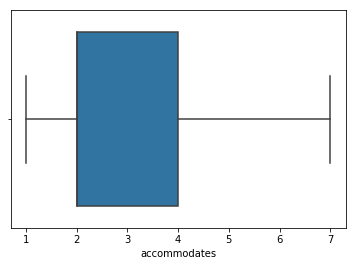

In [16]:
sns.boxplot(df['accommodates'])

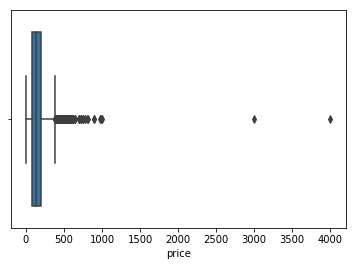

In [17]:
sns.boxplot(df['price'])

In [18]:
df = df[df.price < 1500]

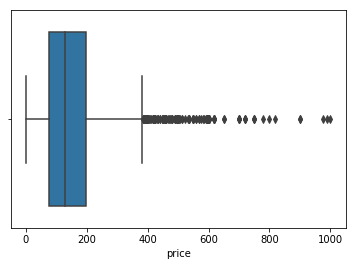

In [19]:
sns.boxplot(df['price'])

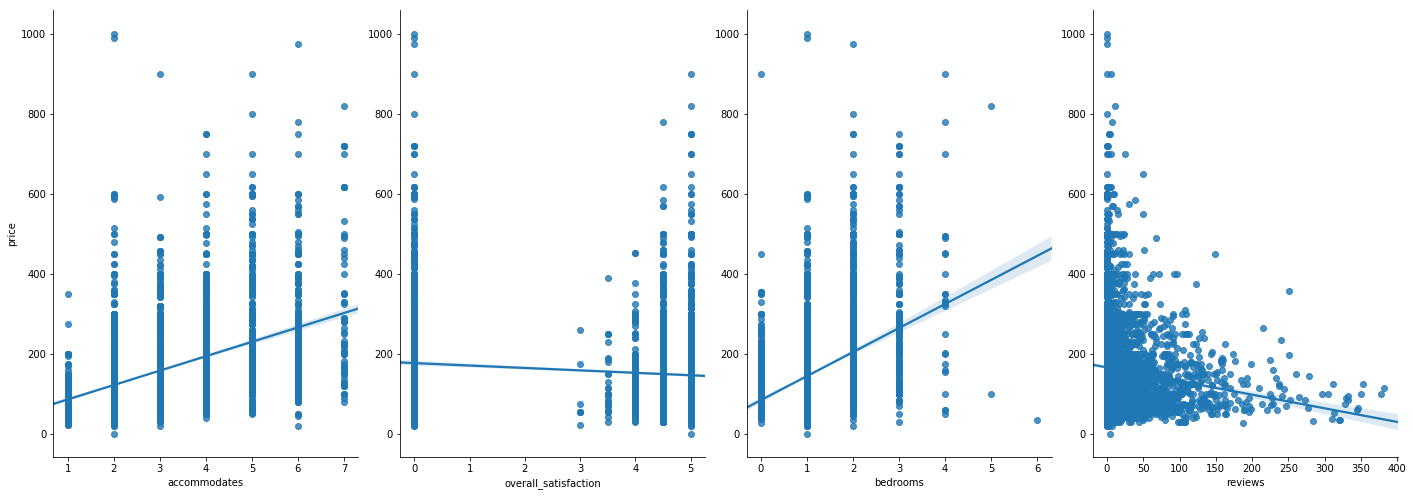

In [20]:
# visualize the relationship between the features and the response using scatterplots
# this produces pairs of scatterplot as shown
# use aspect= to control the size of the graphs
# use kind='reg' to plot linear regression on the graph
sns.pairplot(df, x_vars=['accommodates','overall_satisfaction','bedrooms', 'reviews'], y_vars='price', size=7, aspect=0.7, kind='reg')


## 1. K-Mean Clustering

In [21]:
X = df.iloc[:, [7, 9]].values
X

array([[   3.,  125.],
       [   1.,  105.],
       [   2.,  103.],
       ..., 
       [   1.,   24.],
       [   2.,   28.],
       [   1.,   38.]])

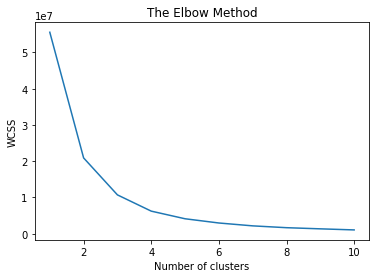

In [22]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

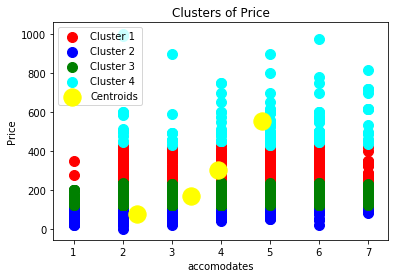

In [24]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Price')
plt.xlabel('accomodates')
plt.ylabel('Price')
plt.legend()
plt.show()

In [25]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

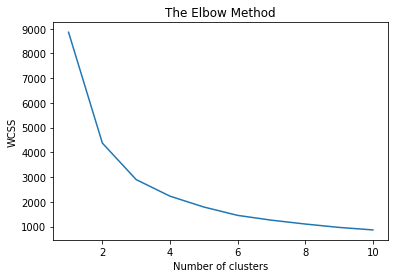

In [26]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

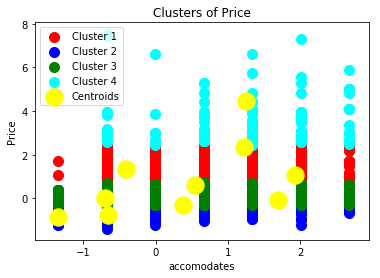

In [27]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Price')
plt.xlabel('accomodates')
plt.ylabel('Price')
plt.legend()
plt.show()

### So, the Scaling had not made any significant change 

In [28]:
Z = df.iloc[:, [7, 9]].values
Z

array([[   3.,  125.],
       [   1.,  105.],
       [   2.,  103.],
       ..., 
       [   1.,   24.],
       [   2.,   28.],
       [   1.,   38.]])

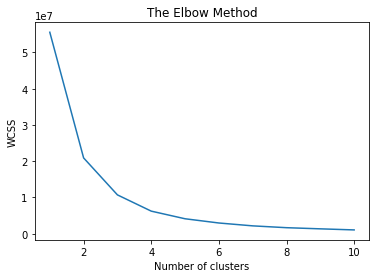

In [29]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Z)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(Z)

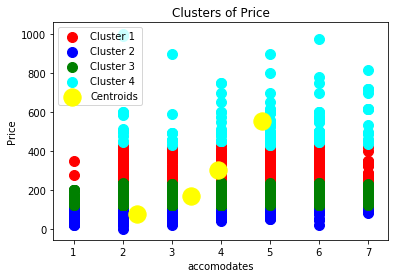

In [31]:
plt.scatter(Z[y_kmeans == 0, 0], Z[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Z[y_kmeans == 1, 0], Z[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Z[y_kmeans == 2, 0], Z[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(Z[y_kmeans == 3, 0], Z[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Price')
plt.xlabel('accomodates')
plt.ylabel('Price')
plt.legend()
plt.show()

### 2. Hierarchical Clustering

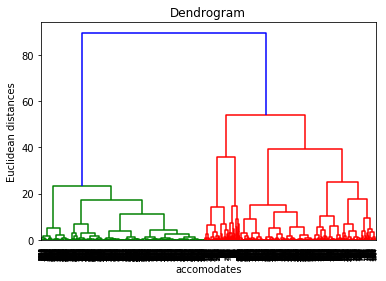

In [32]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('accomodates')
plt.ylabel('Euclidean distances')
plt.show()

In [33]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

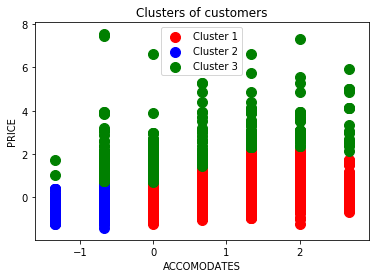

In [34]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')


plt.title('Clusters of customers')
plt.xlabel('ACCOMODATES')
plt.ylabel('PRICE')
plt.legend()
plt.show()

### Both the clustering method generates the similar result

# Part 2- Regression

###  Linear model

In [35]:
Y = df.iloc[:, [9]].values
Y

array([[ 125.],
       [ 105.],
       [ 103.],
       ..., 
       [  24.],
       [  28.],
       [  38.]])

In [36]:
## X= Independent Variable
## Y= Dependent Variable
X= df.iloc[:, [7]].values
X

array([[ 3.],
       [ 1.],
       [ 2.],
       ..., 
       [ 1.],
       [ 2.],
       [ 1.]])

In [37]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

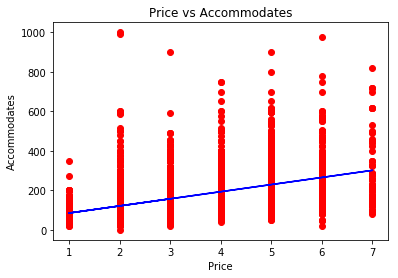

In [38]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, Y)


# Visualising the Training set results
plt.scatter(X, Y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Price vs Accommodates')
plt.xlabel('Price')
plt.ylabel('Accommodates')
plt.show()



In [39]:
import statsmodels.formula.api as sm
quality_model = sm.OLS(Y, X)# Building the optimal model using Backward Elimination
quality_model = sm.OLS(Y, X)
results = quality_model.fit()
# Statsmodels gives R-like statistical output
results.summary()
results = quality_model.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                 1.189e+04
Date:                Fri, 28 Sep 2018   Prob (F-statistic):               0.00
Time:                        18:26:33   Log-Likelihood:                -26707.
No. Observations:                4428   AIC:                         5.342e+04
Df Residuals:                    4427   BIC:                         5.342e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            49.1857      0.451    109.060      0.000      48.301      50.070
==============================================================================
Omnibus:                     1582.353   Durbin-Watson:                   0.744
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10454.420
Skew:                           1.547   Prob(JB):                         0.00
Kurtosis:                       9.862   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
results.get_prediction()

### 2. Multivarient Regression

In [40]:
## X= Independent Variable
## Y= Dependent Variable
# Importing the dataset

X = df.iloc[:,[8,7]].values
Y = df.iloc[:, 9].values

In [41]:
# Logistic Regression with Gridsearch

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn import metrics


X = df.iloc[:,[8,7]].values
y = df.iloc[:, 9].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

params = {
    'penalty':['l1', 'l2', 'elasticnet'],        # l1 is Lasso, l2 is Ridge
    'solver':['liblinear'],
    'C': np.linspace(0.00002,1,100)
}

lr = LogisticRegression()
lr_gs = GridSearchCV(cv=None,
             estimator=LogisticRegression(C=1.0, intercept_scaling=1,   
               dual=False,fit_intercept=True, penalty='l2', tol=0.0001),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},refit=True)


In [42]:
lr_gs.fit(X,Y)

C:\Users\Devyani\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [43]:
lr_gs.best_score_

0.047877145438121049

In [44]:
lr_gs.best_params_

{'C': 0.1}

In [45]:
lr_gs.best_index_

2

In [46]:
lr_gs.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
lr_best = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
lr_best.fit(X_train, y_train)
lr_best.score(X_test, y_test)

0.040632054176072234

In [48]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
X = df[["accommodates","bedrooms"]]
y = df[["price"]]

quality_model = sm.OLS(y, X)
results = quality_model.fit()
# Statsmodels gives R-like statistical output
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     6064.
Date:                Fri, 28 Sep 2018   Prob (F-statistic):               0.00
Time:                        18:27:09   Log-Likelihood:                -26675.
No. Observations:                4428   AIC:                         5.335e+04
Df Residuals:                    4426   BIC:                         5.337e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
accommodates    40.1732      1.212     33.146      0.000      37.797      42.549
bedrooms        22.9834      2.872      8.002      0.000      17.353      28.614
==============================================================================
Omnibus:                     1592.132   Durbin-Watson:                   0.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10373.961
Skew:                           1.563   Prob(JB):                         0.00
Kurtosis:                       9.815   Cond. No.                         7.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
results.get_prediction()

### It shows that the price of the rooms is more dependent on accomodates and on bedrooms too
### while there is a weak relationship between price and overall_satisfaction
### and no relationship between reviews and price

In [51]:
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import metrics
import warnings

C:\Users\Devyani\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [52]:
quality_model = linear_model.LinearRegression()
results = quality_model.fit(X, Y)
print (results.score(X,Y))
# Print the coefficients
print (results.intercept_, results.coef_)

0.233965467027
45.5022524909 [ 31.44896977  14.25786371]


In [53]:
y_pred = results.predict(X)
rmse = np.sqrt(metrics.mean_squared_error(Y, y_pred))
rmse

98.050960358811068

In [54]:
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X,y)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Text(0.5,1,'Ridge Regression ')

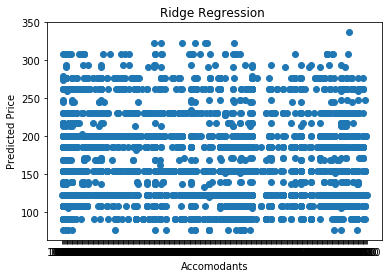

In [55]:
y_predr = ridge.predict(X)

plt.scatter(y, y_predr)
plt.xlabel("Accomodants")
plt.ylabel("Predicted Price")
plt.title("Ridge Regression ")

In [56]:
rmser = np.sqrt(metrics.mean_squared_error(y, y_predr))
rmser

98.050960392083937

In [57]:
ymean = np.mean(y_predr)
ymean

157.65537488708222

In [58]:
yscore = rmser/ymean
yscore

0.6219322396227287

## Polynomial Regression results - Logistic Model

In [59]:
## X= Independent Variable
## Y= Dependent Variable
X= df.iloc[:, [7]].values
X.shape

(4428, 1)

In [60]:
## X= Independent Variable
## Y= Dependent Variable
Y= df.iloc[:, [9]].values
Y.shape

(4428, 1)

In [61]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, Y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

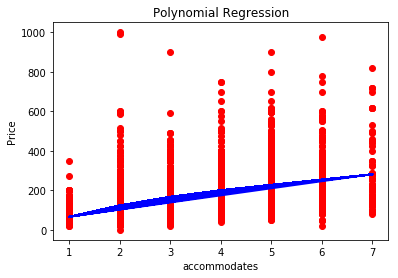

In [62]:
# Visualising the Polynomial Regression results
plt.scatter(X, Y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('accommodates')
plt.ylabel('Price')
plt.show()

In [63]:
quality_model = sm.OLS(Y, X)# Building the optimal model using Backward Elimination
import statsmodels.formula.api as sm
quality_model = sm.OLS(Y, X)
results = quality_model.fit()
# Statsmodels gives R-like statistical output
results.summary()
results = quality_model.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                 1.189e+04
Date:                Fri, 28 Sep 2018   Prob (F-statistic):               0.00
Time:                        18:27:20   Log-Likelihood:                -26707.
No. Observations:                4428   AIC:                         5.342e+04
Df Residuals:                    4427   BIC:                         5.342e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            49.1857      0.451    109.060      0.000      48.301      50.070
==============================================================================
Omnibus:                     1582.353   Durbin-Watson:                   0.744
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10454.420
Skew:                           1.547   Prob(JB):                         0.00
Kurtosis:                       9.862   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))


In [87]:
X = df.iloc[:,[8,7]].values
y = df.iloc[:, 9].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

g = GridSearchCV(PolynomialRegression(), param_grid={'C': [ 0.01, 0.1, 1, 10, 100, 1000]}, cv=10, scoring='neg_mean_squared_error')

In [88]:
g.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)>

In [89]:
g.fit(X,Y)

ValueError: Invalid parameter C for estimator Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
g.best_estimator_

In [ ]:
g_best=PolynomialFeatures(degree=4, include_bias=True, interaction_only=False), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False
                                                                                                                     ))

In [ ]:
g_best.fit(X)

# 3. Logistic Regression

In [ ]:
# Logistic Regression

X = df.iloc[:,[7,8]].values
y = df.iloc[:,9].values

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [ ]:
 ##b=y_test.reshape(1772,1)

In [ ]:
##a= y_train.reshape(2656,1)

In [ ]:
##b=y_test.reshape(2656, 1)

In [ ]:
##a.shape, b.shape

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
#fitting logistic to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state =0)
classifier.fit(X_train, y_train)

In [ ]:
#fitting logistic to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state =0)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm



In [ ]:
X_train.shape

In [ ]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
#visualizing the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1,X2= np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1, step = 0.01),
 np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
                   cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())       
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
                c=ListedColormap(('red','green'))(i) , label = j)
             
plt.title('Training Set Logistic Regression')
plt.xlabel('Applicant Income')
plt.ylabel('Credit History')
plt.legend()
plt.show()             

In [ ]:
a = y_train[-1772:]


In [ ]:
a.shape

In [ ]:
rmser = np.sqrt(metrics.mean_squared_error(a, y_test))
rmser

In [ ]:
rmser = np.sqrt(metrics.mean_squared_error(y_test, a))
rmser

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

In [ ]:
print("Accuracy score using Logistic regression is %s" %metrics.accuracy_score(y_test, a))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, cross_validation
predicted = cross_validation.cross_val_predict(classifier, X, y, cv=10)
print (metrics.accuracy_score(y, predicted))
print (metrics.classification_report(y, predicted))